# MadGraph5_aMC@NLO Local Installation Tutorial v15
Run everything locally in `mg5_tutorial/` without CVMFS or lxplus.

**Outline:**
1. Prepare Working Directory
2. Clone MadGraph Repository
3. Disable Browser Opening & Configure Paths
4. Install Pythia8 Interface Plugin
5. Download & Compile Pythia8
6. Download & Compile Delphes
7. Generate LO Events
8. Generate NLO Events
9. Showering & Detector Simulation
10. Analysis in Python
11. Next Steps

## 1. Prepare Working Directory

In [9]:
%%bash
rm -rf mg5_tutorial
mkdir -p mg5_tutorial/External
echo "Created mg5_tutorial/ and External/ directories."

Created mg5_tutorial/ and External/ directories.


## 2. Clone MadGraph Repository

In [14]:
%%bash
cd mg5_tutorial
wget https://launchpad.net/mg5amcnlo/lts/lts.3.5.x/+download/MG5_aMC_v3.5.6.tar.gz \
     -O MG5_aMC_v3_5_6.tar.gz
tar -xzf MG5_aMC_v3_5_6.tar.gz
mv MG5_aMC_v3.5.6 MG5_aMC_v3_5_6
echo "MadGraph LTS 3.5.6 extracted to MG5_aMC_v3_5_6/."

--2025-06-15 20:18:27--  https://launchpad.net/mg5amcnlo/lts/lts.3.5.x/+download/MG5_aMC_v3.5.6.tar.gz


Resolving launchpad.net (launchpad.net)... 185.125.189.223, 185.125.189.222, 2620:2d:4000:1009::3ba, ...
Connecting to launchpad.net (launchpad.net)|185.125.189.223|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://launchpadlibrarian.net/751503417/MG5_aMC_v3.5.6.tar.gz [following]
--2025-06-15 20:18:27--  https://launchpadlibrarian.net/751503417/MG5_aMC_v3.5.6.tar.gz
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 185.125.189.229, 185.125.189.228, 2620:2d:4000:1009::13e, ...
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|185.125.189.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30051758 (29M) [application/x-tar]
Saving to: ‘MG5_aMC_v3_5_6.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  223K 2m12s
    50K .......... .......... .......... .......... ..........  0%  451K 98s
   100K .......... .......... .......... .......... ..........  0% 94.0M 65s
   150K ..

MadGraph LTS 3.5.6 extracted to MG5_aMC_v3_5_6/.


## 3. Disable Browser Opening & Configure Paths

In [19]:
%%bash
pwd
cd mg5_tutorial/MG5_aMC_v3_5_6
pwd
for f in ./input/mg5_configuration.txt; do
  if [ -f "$f" ]; then
    sed -i 's|^automatic_html_opening.*|automatic_html_opening = False|' "$f"
    sed -i 's|^# *pythia8_path.*|pythia8_path = ../External/pythia8|' "$f"
    sed -i 's|^# *delphes_path.*|delphes_path = ../External/Delphes|' "$f"
    echo "Configured $f"
  else
    echo "No config file at $f"
  fi
done

/home/sgoswami/MG_TUTORIAL
/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6
Configured ./input/mg5_configuration.txt


In [ ]:
%%bash
cd mg5_tutorial/MG5_aMC_v3_5_6

# Let MadGraph download and build Pythia8 and Delphes internally
./bin/mg5_aMC <<EOF
#install pythia8
#install mg5amc_py8_interface
install Delphes
install lhapdf6
install mg5amc_py8_interface
exit
EOF

echo "MadGraph has installed Pythia8 and Delphes under MG5_aMC_v3_5_6/HEPTools/"


************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6                 2024-09-26         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

--2025-06-15 20:51:56--  http://cp3.irmp.ucl.ac.be/downloads/Delphes-3-current.tar.gz
Resolving cp3.irmp.ucl.ac.be (cp3.irmp.ucl.ac.be)... 130.104.48.109
Connecting to cp3.irmp.ucl.ac.be (cp3.irmp.ucl.ac.be)|130.104.48.109|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5421664 (5.2M) [application/x-gzip]
Saving to: ‘Delphes.tgz’

     0K .......... .......... .......... .......... ..........  0%  227K 23s
    50K .......... .......... .......... .......... ..........  1%  456K 17s
   100K .......... .......... .......... .......... ..........  2% 27.2M 11s
   150K .......... .......... .......... .......... ..........  3% 30.8M 8s
   200K .......... .......... .......... .......... ..........  4%  467K 9s
   250K .......... .......... .......... .......... ..........  5% 76.0M 7s
   300K .......... .......... .......... .......... ..........  6% 11.5M 6s
   350K .......... .......... .......... .......... ..........  7% 51.8M 5s
   400K .......... .......... .

compile Delphes. This might take a while.
>> Generating tmp/classes/ClassesDict.cc
>> Compiling tmp/classes/ClassesDict.cc
>> Generating tmp/external/ExRootAnalysis/ExRootAnalysisDict.cc
>> Compiling tmp/external/ExRootAnalysis/ExRootAnalysisDict.cc
>> Generating tmp/modules/ModulesDict.cc
>> Compiling tmp/modules/ModulesDict.cc
>> Compiling classes/DelphesClasses.cc


In file included from classes/DelphesClasses.cc:29:
./classes/DelphesClasses.h: In constructor ‘Candidate::Candidate()’:
./classes/DelphesClasses.h:740:15: warning: ‘Candidate::TrackCovariance’ will be initialized after [-Wreorder]
  740 |   TMatrixDSym TrackCovariance;
      |               ^~~~~~~~~~~~~~~
./classes/DelphesClasses.h:683:11: warning:   ‘Float_t Candidate::L’ [-Wreorder]
  683 |   Float_t L; // path length
      |           ^
classes/DelphesClasses.cc:209:1: warning:   when initialized here [-Wreorder]
  209 | Candidate::Candidate() :
      | ^~~~~~~~~
./classes/DelphesClasses.h:688:11: warning: ‘Candidate::ErrorD0’ will be initialized after [-Wreorder]
  688 |   Float_t ErrorD0;
      |           ^~~~~~~
./classes/DelphesClasses.h:684:11: warning:   ‘Float_t Candidate::DZ’ [-Wreorder]
  684 |   Float_t DZ;
      |           ^~
classes/DelphesClasses.cc:209:1: warning:   when initialized here [-Wreorder]
  209 | Candidate::Candidate() :
      | ^~~~~~~~~
./classes/Delph

>> Compiling classes/DelphesCylindricalFormula.cc
>> Compiling classes/DelphesFactory.cc
>> Compiling classes/DelphesFormula.cc
>> Compiling classes/DelphesHepMC2Reader.cc
>> Compiling classes/DelphesHepMC3Reader.cc


classes/DelphesHepMC3Reader.cc: In member function ‘void DelphesHepMC3Reader::FinalizeParticles(TObjArray*, TObjArray*, TObjArray*)’:
classes/DelphesHepMC3Reader.cc:468:16: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<std::pair<TLorentzVector*, TObjArray*> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
  468 |   for(i = 0; i < fVertices.size(); ++i)
      |              ~~^~~~~~~~~~~~~~~~~~


>> Compiling classes/DelphesLHEFReader.cc
>> Compiling classes/DelphesModule.cc
>> Compiling classes/DelphesPileUpReader.cc
>> Compiling classes/DelphesPileUpWriter.cc
>> Compiling classes/DelphesSTDHEPReader.cc
>> Compiling classes/DelphesStream.cc
>> Compiling classes/DelphesTF2.cc
>> Compiling classes/DelphesXDRReader.cc


classes/DelphesXDRReader.cc: In member function ‘void DelphesXDRReader::ReadRaw(void*, int)’:
classes/DelphesXDRReader.cc:76:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’ declared with attribute ‘warn_unused_result’ [-Wunused-result]
   76 |     fread(value, 1, size + rndup, fFile);
      |     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


>> Compiling classes/DelphesXDRWriter.cc
>> Compiling external/ExRootAnalysis/ExRootConfReader.cc
>> Compiling external/ExRootAnalysis/ExRootFilter.cc
>> Compiling external/ExRootAnalysis/ExRootProgressBar.cc
>> Compiling external/ExRootAnalysis/ExRootResult.cc
>> Compiling external/ExRootAnalysis/ExRootTask.cc
>> Compiling external/ExRootAnalysis/ExRootTreeBranch.cc
>> Compiling external/ExRootAnalysis/ExRootTreeReader.cc
>> Compiling external/ExRootAnalysis/ExRootTreeWriter.cc
>> Compiling external/ExRootAnalysis/ExRootUtilities.cc
>> Compiling external/Hector/H_AbstractBeamLine.cc
>> Compiling external/Hector/H_Aperture.cc
>> Compiling external/Hector/H_Beam.cc
>> Compiling external/Hector/H_BeamLine.cc
>> Compiling external/Hector/H_BeamLineParser.cc
>> Compiling external/Hector/H_BeamParticle.cc


external/Hector/H_BeamParticle.cc: In member function ‘void H_BeamParticle::computePath(const H_AbstractBeamLine*, bool)’:
external/Hector/H_BeamParticle.cc:483:32: warning: variable ‘temp_s’ set but not used [-Wunused-but-set-variable]
  483 |         double temp_x, temp_y, temp_s, temp_tx, temp_ty;
      |                                ^~~~~~
external/Hector/H_BeamParticle.cc: In member function ‘void H_BeamParticle::computePath(const H_AbstractBeamLine&, bool)’:
external/Hector/H_BeamParticle.cc:533:32: warning: variable ‘temp_s’ set but not used [-Wunused-but-set-variable]
  533 |         double temp_x, temp_y, temp_s, temp_tx, temp_ty;
      |                                ^~~~~~


>> Compiling external/Hector/H_CircularAperture.cc
>> Compiling external/Hector/H_Dipole.cc
>> Compiling external/Hector/H_Drift.cc
>> Compiling external/Hector/H_EllipticAperture.cc
>> Compiling external/Hector/H_HorizontalKicker.cc
>> Compiling external/Hector/H_HorizontalQuadrupole.cc
>> Compiling external/Hector/H_Kicker.cc
>> Compiling external/Hector/H_Marker.cc
>> Compiling external/Hector/H_OpticalElement.cc
>> Compiling external/Hector/H_Parameters.cc
>> Compiling external/Hector/H_Quadrupole.cc
>> Compiling external/Hector/H_RecRPObject.cc
>> Compiling external/Hector/H_RectEllipticAperture.cc
>> Compiling external/Hector/H_RectangularAperture.cc
>> Compiling external/Hector/H_RectangularCollimator.cc
>> Compiling external/Hector/H_RectangularDipole.cc
>> Compiling external/Hector/H_RomanPot.cc
>> Compiling external/Hector/H_SectorDipole.cc
>> Compiling external/Hector/H_TransportMatrices.cc
>> Compiling external/Hector/H_VerticalKicker.cc
>> Compiling external/Hector/H_Verti

external/TrackCovariance/AcceptanceClx.cc: In constructor ‘AcceptanceClx::AcceptanceClx(SolGeom*)’:
external/TrackCovariance/AcceptanceClx.cc:206:15: warning: unused variable ‘Nrows’ [-Wunused-variable]
  206 |         Int_t Nrows = fAcc.GetNrows();
      |               ^~~~~
external/TrackCovariance/AcceptanceClx.cc:207:15: warning: unused variable ‘Ncols’ [-Wunused-variable]
  207 |         Int_t Ncols = fAcc.GetNcols();
      |               ^~~~~


>> Compiling external/TrackCovariance/ObsTrk.cc


external/TrackCovariance/ObsTrk.cc: In member function ‘TVectorD ObsTrk::GenToObsPar(TVectorD, SolGridCov*)’:
external/TrackCovariance/ObsTrk.cc:123:18: warning: unused variable ‘minPt’ [-Wunused-variable]
  123 |         Double_t minPt = GC->GetMinPt ();
      |                  ^~~~~
external/TrackCovariance/ObsTrk.cc:125:18: warning: unused variable ‘maxPt’ [-Wunused-variable]
  125 |         Double_t maxPt = GC->GetMaxPt();
      |                  ^~~~~
external/TrackCovariance/ObsTrk.cc:127:18: warning: unused variable ‘minAn’ [-Wunused-variable]
  127 |         Double_t minAn = GC->GetMinAng();
      |                  ^~~~~
external/TrackCovariance/ObsTrk.cc:130:18: warning: unused variable ‘maxAn’ [-Wunused-variable]
  130 |         Double_t maxAn = GC->GetMaxAng();
      |                  ^~~~~
external/TrackCovariance/ObsTrk.cc:150:16: warning: unused variable ‘OK’ [-Wunused-variable]
  150 |         Bool_t OK = Chl.Decompose();            // Choleski decomposition of norma

>> Compiling external/TrackCovariance/SolGeom.cc
>> Compiling external/TrackCovariance/SolGridCov.cc


external/TrackCovariance/SolGridCov.cc: In member function ‘void SolGridCov::Calc(SolGeom*)’:
external/TrackCovariance/SolGridCov.cc:49:11: warning: unused variable ‘ipt’ [-Wunused-variable]
   49 |     Int_t ipt = TMath::Nint(10 * pta(ip));
      |           ^~~


>> Compiling external/TrackCovariance/SolTrack.cc


external/TrackCovariance/SolTrack.cc: In member function ‘void SolTrack::CovCalc(Bool_t, Bool_t)’:
external/TrackCovariance/SolTrack.cc:370:34: warning: unused variable ‘phi0i’ [-Wunused-variable]
  370 |                         Double_t phi0i = phi0();
      |                                  ^~~~~
external/TrackCovariance/SolTrack.cc:372:34: warning: unused variable ‘z0i’ [-Wunused-variable]
  372 |                         Double_t z0i   = z0();
      |                                  ^~~
external/TrackCovariance/SolTrack.cc:272:15: warning: variable ‘kmh’ set but not used [-Wunused-but-set-variable]
  272 |         Int_t kmh;                                                              // Number of measurement layers hit
      |               ^~~
external/TrackCovariance/SolTrack.cc: In destructor ‘SolTrack::~SolTrack()’:
external/TrackCovariance/SolTrack.cc:106:20: warning: ‘void operator delete [](void*)’ called on pointer ‘<unknown>’ with nonzero offset 16 [-Wfree-nonheap-object

>> Compiling external/TrackCovariance/TrkUtil.cc


external/TrackCovariance/TrkUtil.cc: In member function ‘Double_t TrkUtil::TrkLen(TVectorD)’:
external/TrackCovariance/TrkUtil.cc:266:26: warning: unused variable ‘phi0’ [-Wunused-variable]
  266 |                 Double_t phi0 = Par(1);         // Transverse direction at minimum approach
      |                          ^~~~


>> Compiling external/TrackCovariance/VertexFit.cc


external/TrackCovariance/VertexFit.cc: In member function ‘TMatrixD VertexFit::Fill_A(TVectorD, Double_t)’:
external/TrackCovariance/VertexFit.cc:340:18: warning: unused variable ‘z0’ [-Wunused-variable]
  340 |         Double_t z0 = par(3);
      |                  ^~
external/TrackCovariance/VertexFit.cc: In member function ‘TVectorD VertexFit::Fill_a(TVectorD, Double_t)’:
external/TrackCovariance/VertexFit.cc:380:18: warning: unused variable ‘D’ [-Wunused-variable]
  380 |         Double_t D = par(0);
      |                  ^
external/TrackCovariance/VertexFit.cc:383:18: warning: unused variable ‘z0’ [-Wunused-variable]
  383 |         Double_t z0 = par(3);
      |                  ^~
external/TrackCovariance/VertexFit.cc: In member function ‘TVectorD VertexFit::Fill_x0(TVectorD)’:
external/TrackCovariance/VertexFit.cc:404:18: warning: unused variable ‘C’ [-Wunused-variable]
  404 |         Double_t C = par(2);
      |                  ^
external/TrackCovariance/VertexFit.cc:406:1

>> Compiling modules/AngularSmearing.cc
>> Compiling modules/BTagging.cc
>> Compiling modules/BeamSpotFilter.cc
>> Compiling modules/Calorimeter.cc
>> Compiling modules/Cloner.cc
>> Compiling modules/ClusterCounting.cc
>> Compiling modules/ConstituentFilter.cc
>> Compiling modules/DecayFilter.cc


modules/DecayFilter.cc: In member function ‘virtual void DecayFilter::Process()’:
modules/DecayFilter.cc:101:10: warning: unused variable ‘hasDecayed’ [-Wunused-variable]
  101 |   Bool_t hasDecayed = kFALSE;
      |          ^~~~~~~~~~


>> Compiling modules/Delphes.cc
>> Compiling modules/DenseTrackFilter.cc
>> Compiling modules/DualReadoutCalorimeter.cc


modules/DualReadoutCalorimeter.cc: In member function ‘virtual void DualReadoutCalorimeter::Process()’:
modules/DualReadoutCalorimeter.cc:227:12: warning: unused variable ‘ecalSigma’ [-Wunused-variable]
  227 |   Double_t ecalSigma, hcalSigma, sigma;
      |            ^~~~~~~~~
modules/DualReadoutCalorimeter.cc:227:23: warning: unused variable ‘hcalSigma’ [-Wunused-variable]
  227 |   Double_t ecalSigma, hcalSigma, sigma;
      |                       ^~~~~~~~~
modules/DualReadoutCalorimeter.cc: In member function ‘void DualReadoutCalorimeter::FinalizeTower()’:
modules/DualReadoutCalorimeter.cc:488:12: warning: unused variable ‘ecalNeutralEnergy’ [-Wunused-variable]
  488 |   Double_t ecalNeutralEnergy, hcalNeutralEnergy, neutralEnergy;
      |            ^~~~~~~~~~~~~~~~~
modules/DualReadoutCalorimeter.cc:488:31: warning: unused variable ‘hcalNeutralEnergy’ [-Wunused-variable]
  488 |   Double_t ecalNeutralEnergy, hcalNeutralEnergy, neutralEnergy;
      |                             

>> Compiling modules/Efficiency.cc
>> Compiling modules/EnergyScale.cc
>> Compiling modules/EnergySmearing.cc
>> Compiling modules/ExampleModule.cc
>> Compiling modules/Hector.cc
>> Compiling modules/IdentificationMap.cc
>> Compiling modules/ImpactParameterSmearing.cc
>> Compiling modules/Isolation.cc
>> Compiling modules/JetFakeParticle.cc
>> Compiling modules/JetFlavorAssociation.cc
>> Compiling modules/JetPileUpSubtractor.cc
>> Compiling modules/LeptonDressing.cc
>> Compiling modules/Merger.cc
>> Compiling modules/MomentumSmearing.cc
>> Compiling modules/OldCalorimeter.cc


modules/OldCalorimeter.cc: In member function ‘virtual void OldCalorimeter::Init()’:
modules/OldCalorimeter.cc:92:51: warning: variable ‘sizeFractions’ set but not used [-Wunused-but-set-variable]
   92 |   Long_t i, j, k, size, sizeEtaBins, sizePhiBins, sizeFractions;
      |                                                   ^~~~~~~~~~~~~


>> Compiling modules/ParticleDensity.cc
>> Compiling modules/ParticlePropagator.cc
>> Compiling modules/PdgCodeFilter.cc
>> Compiling modules/PhotonConversions.cc
>> Compiling modules/PhotonID.cc
>> Compiling modules/PileUpJetID.cc


modules/PileUpJetID.cc: In member function ‘virtual void PileUpJetID::Process()’:
modules/PileUpJetID.cc:173:26: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<std::pair<float, float> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
  173 |         for(int i = 0; i < constituent->ECalEnergyTimePairs.size(); i++)
      |                        ~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


>> Compiling modules/PileUpMerger.cc
>> Compiling modules/RecoPuFilter.cc


modules/RecoPuFilter.cc: In member function ‘virtual void RecoPuFilter::Init()’:
modules/RecoPuFilter.cc:72:10: warning: unused variable ‘i’ [-Wunused-variable]
   72 |   Size_t i, size;
      |          ^
modules/RecoPuFilter.cc:72:13: warning: unused variable ‘size’ [-Wunused-variable]
   72 |   Size_t i, size;
      |             ^~~~
modules/RecoPuFilter.cc: In member function ‘virtual void RecoPuFilter::Process()’:
modules/RecoPuFilter.cc:94:9: warning: unused variable ‘pdgCode’ [-Wunused-variable]
   94 |   Int_t pdgCode;
      |         ^~~~~~~
modules/RecoPuFilter.cc:95:10: warning: unused variable ‘pass’ [-Wunused-variable]
   95 |   Bool_t pass;
      |          ^~~~
modules/RecoPuFilter.cc:96:12: warning: unused variable ‘pt’ [-Wunused-variable]
   96 |   Double_t pt;
      |            ^~


>> Compiling modules/SimpleCalorimeter.cc
>> Compiling modules/StatusPidFilter.cc
>> Compiling modules/TaggingParticlesSkimmer.cc
>> Compiling modules/TauTagging.cc
>> Compiling modules/TimeOfFlight.cc


modules/TimeOfFlight.cc: In member function ‘virtual void TimeOfFlight::Process()’:
modules/TimeOfFlight.cc:98:30: warning: variable ‘mass’ set but not used [-Wunused-but-set-variable]
   98 |   Double_t l, tof, beta, p,  mass;
      |                              ^~~~


>> Compiling modules/TimeSmearing.cc


In file included from modules/TimeSmearing.cc:27:
./modules/TimeSmearing.h: In constructor ‘TimeSmearing::TimeSmearing()’:
./modules/TimeSmearing.h:51:14: warning: ‘TimeSmearing::fItTrackInputArray’ will be initialized after [-Wreorder]
   51 |   TIterator *fItTrackInputArray; //!
      |              ^~~~~~~~~~~~~~~~~~
./modules/TimeSmearing.h:48:19: warning:   ‘DelphesFormula* TimeSmearing::fResolutionFormula’ [-Wreorder]
   48 |   DelphesFormula *fResolutionFormula;
      |                   ^~~~~~~~~~~~~~~~~~
modules/TimeSmearing.cc:53:1: warning:   when initialized here [-Wreorder]
   53 | TimeSmearing::TimeSmearing() :
      | ^~~~~~~~~~~~


>> Compiling modules/TrackCountingBTagging.cc
>> Compiling modules/TrackCountingTauTagging.cc


modules/TrackCountingTauTagging.cc: In member function ‘virtual void TrackCountingTauTagging::Process()’:
modules/TrackCountingTauTagging.cc:209:9: warning: variable ‘pdgCode’ set but not used [-Wunused-but-set-variable]
  209 |   Int_t pdgCode, charge, i, identifier;
      |         ^~~~~~~


>> Compiling modules/TrackCovariance.cc
>> Compiling modules/TrackPileUpSubtractor.cc
>> Compiling modules/TrackSmearing.cc
>> Compiling modules/TreeWriter.cc


modules/TreeWriter.cc: In member function ‘void TreeWriter::ProcessTracks(ExRootTreeBranch*, TObjArray*)’:
modules/TreeWriter.cc:322:38: warning: variable ‘rapidity’ set but not used [-Wunused-but-set-variable]
  322 |   Double_t pt, signz, cosTheta, eta, rapidity, p, ctgTheta, phi, m;
      |                                      ^~~~~~~~
modules/TreeWriter.cc: In member function ‘void TreeWriter::ProcessTowers(ExRootTreeBranch*, TObjArray*)’:
modules/TreeWriter.cc:430:39: warning: variable ‘rapidity’ set but not used [-Wunused-but-set-variable]
  430 |   Double_t pt, signPz, cosTheta, eta, rapidity;
      |                                       ^~~~~~~~
modules/TreeWriter.cc: In member function ‘void TreeWriter::ProcessParticleFlowCandidates(ExRootTreeBranch*, TObjArray*)’:
modules/TreeWriter.cc:476:14: warning: variable ‘particle’ set but not used [-Wunused-but-set-variable]
  476 |   Candidate *particle = 0;
      |              ^~~~~~~~
modules/TreeWriter.cc:478:41: warning: variab

>> Compiling modules/TruthVertexFinder.cc
>> Compiling modules/UniqueObjectFinder.cc
>> Compiling modules/VertexFinder.cc


modules/VertexFinder.cc:85:15: warning: ‘Bool_t secondAscending(std::pair<unsigned int, double>, std::pair<unsigned int, double>)’ defined but not used [-Wunused-function]
   85 | static Bool_t secondAscending(pair<UInt_t, Double_t> pair0, pair<UInt_t, Double_t> pair1)
      |               ^~~~~~~~~~~~~~~


>> Compiling modules/VertexFinderDA4D.cc


modules/VertexFinderDA4D.cc: In member function ‘std::vector<Candidate*> VertexFinderDA4D::vertices()’:
modules/VertexFinderDA4D.cc:359:22: warning: variable ‘l’ set but not used [-Wunused-but-set-variable]
  359 |   Double_t z, dz, t, l, dt, d0, d0error;
      |                      ^
modules/VertexFinderDA4D.cc: In function ‘void dump(double, const std::vector<vertex_t>&, const std::vector<track_t>&)’:
modules/VertexFinderDA4D.cc:699:12: warning: unused variable ‘tz’ [-Wunused-variable]
  699 |     double tz = tks[i].z;
      |            ^~
modules/VertexFinderDA4D.cc:700:12: warning: unused variable ‘tt’ [-Wunused-variable]
  700 |     double tt = tks[i].t;
      |            ^~


>> Compiling modules/VertexSorter.cc
>> Compiling modules/Weighter.cc
>> Compiling external/tcl/panic.c
>> Compiling external/tcl/tclAlloc.c
>> Compiling external/tcl/tclAsync.c
>> Compiling external/tcl/tclBasic.c
>> Compiling external/tcl/tclCkalloc.c
>> Compiling external/tcl/tclCmdAH.c
>> Compiling external/tcl/tclCmdIL.c
>> Compiling external/tcl/tclCmdMZ.c
>> Compiling external/tcl/tclCompExpr.c
>> Compiling external/tcl/tclCompile.c


external/tcl/tclCompile.c: In function ‘TclObjIndexForString’:
external/tcl/tclCompile.c:6513:24: warning: cast from pointer to integer of different size [-Wpointer-to-int-cast]
 6513 |             objIndex = (int) Tcl_GetHashValue(hPtr);
      |                        ^
In file included from external/tcl/tclInt.h:33,
                 from external/tcl/tclCompile.c:17:
external/tcl/tcl.h:820:55: warning: cast to pointer from integer of different size [-Wint-to-pointer-cast]
  820 | #define Tcl_SetHashValue(h, value) ((h)->clientData = (ClientData) (value))
      |                                                       ^
external/tcl/tclCompile.c:6554:9: note: in expansion of macro ‘Tcl_SetHashValue’
 6554 |         Tcl_SetHashValue(hPtr, objIndex);
      |         ^~~~~~~~~~~~~~~~
In function ‘LookupCompiledLocal’,
    inlined from ‘TclCompileForeachCmd’ at external/tcl/tclCompile.c:4032:22:
external/tcl/tclCompile.c:6156:27: warning: array subscript ‘CompiledLocal[0]’ is partly outside

>> Compiling external/tcl/tclExecute.c


In file included from external/tcl/tclExecute.c:15:
external/tcl/tclExecute.c: In function ‘TclExecuteByteCode’:
external/tcl/tclInt.h:1752:21: warning: the address of ‘length’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclExecute.c:565:29: note: in expansion of macro ‘TclGetStringFromObj’
  565 |                     bytes = TclGetStringFromObj(valuePtr, &length);
      |                             ^~~~~~~~~~~~~~~~~~~
external/tcl/tclExecute.c: At top level:
external/tcl/tclExecute.c:190:25: warning: ‘PrintByteCodeInfo’ declared ‘static’ but never defined [-Wunused-function]
  190 | static void             PrintByteCodeInfo _ANSI_ARGS_((ByteCode *codePtr));
      |                         ^~~~~~~~~~~~~~~~~


>> Compiling external/tcl/tclGet.c
>> Compiling external/tcl/tclHash.c
>> Compiling external/tcl/tclIndexObj.c


external/tcl/tclIndexObj.c: In function ‘Tcl_GetIndexFromObj’:
external/tcl/tclIndexObj.c:89:21: warning: cast from pointer to integer of different size [-Wpointer-to-int-cast]
   89 |         *indexPtr = (int) objPtr->internalRep.twoPtrValue.ptr2;
      |                     ^
external/tcl/tclIndexObj.c:131:44: warning: cast to pointer from integer of different size [-Wint-to-pointer-cast]
  131 |     objPtr->internalRep.twoPtrValue.ptr2 = (VOID *) index;
      |                                            ^
external/tcl/tclIndexObj.c: In function ‘Tcl_WrongNumArgs’:
external/tcl/tclIndexObj.c:293:30: warning: cast from pointer to integer of different size [-Wpointer-to-int-cast]
  293 |                     tablePtr[(int) objv[i]->internalRep.twoPtrValue.ptr2],
      |                              ^


>> Compiling external/tcl/tclLink.c
>> Compiling external/tcl/tclListObj.c


In file included from external/tcl/tclListObj.c:16:
external/tcl/tclListObj.c: In function ‘SetListFromAny’:
external/tcl/tclInt.h:1752:21: warning: the address of ‘length’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclListObj.c:791:14: note: in expansion of macro ‘TclGetStringFromObj’
  791 |     string = TclGetStringFromObj(objPtr, &length);
      |              ^~~~~~~~~~~~~~~~~~~


>> Compiling external/tcl/tclNamesp.c
>> Compiling external/tcl/tclObj.c


external/tcl/tclObj.c: In function ‘TclAllocateFreeObjects’:
external/tcl/tclObj.c:461:10: warning: cast from pointer to integer of different size [-Wpointer-to-int-cast]
  461 |         ((int)(&(tmp[1])) - (int)(&(tmp[0])));
      |          ^
external/tcl/tclObj.c:461:29: warning: cast from pointer to integer of different size [-Wpointer-to-int-cast]
  461 |         ((int)(&(tmp[1])) - (int)(&(tmp[0])));
      |                             ^
In file included from external/tcl/tclObj.c:15:
external/tcl/tclObj.c: In function ‘SetBooleanFromAny’:
external/tcl/tclInt.h:1752:21: warning: the address of ‘length’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclObj.c:828:14: note: in expansion of macro ‘TclGetStringFromObj’
  828 |     string = TclGetStringFromObj(objPtr, &length);
      |              ^~~~~~~~~~~~~~~~~~~
external/tcl/tclObj.c: In function ‘SetDoubleFromAny’:
external/tcl/tclInt.h:1752:21: warning: the 

>> Compiling external/tcl/tclParse.c
>> Compiling external/tcl/tclPreserve.c
>> Compiling external/tcl/tclProc.c


external/tcl/tclProc.c: In function ‘TclObjInterpProc’:
external/tcl/tclProc.c:833:43: warning: unused variable ‘length’ [-Wunused-variable]
  833 |     int nameLen, localCt, numArgs, argCt, length, i, result;
      |                                           ^~~~~~
external/tcl/tclProc.c:832:22: warning: unused variable ‘bytes’ [-Wunused-variable]
  832 |     char *procName, *bytes;
      |                      ^~~~~
external/tcl/tclProc.c: In function ‘TclCreateProc’:
external/tcl/tclProc.c:346:26: warning: ‘localPtr’ may be used uninitialized [-Wmaybe-uninitialized]
  346 |             if ((localPtr->nameLength != nameLength)
      |                  ~~~~~~~~^~~~~~~~~~~~
external/tcl/tclProc.c:188:29: note: ‘localPtr’ was declared here
  188 |     register CompiledLocal *localPtr;
      |                             ^~~~~~~~


>> Compiling external/tcl/tclResolve.c
>> Compiling external/tcl/tclStringObj.c


In file included from external/tcl/tclInt.h:33,
                 from external/tcl/tclStringObj.c:20:
external/tcl/tclStringObj.c: In function ‘Tcl_AppendStringsToObj’:
external/tcl/tcl.h:156:69: warning: right-hand operand of comma expression has no effect [-Wunused-value]
  156 | #   define TCL_VARARGS_START(type, name, list) (va_start(list, name), name)
      |                                                ~~~~~~~~~~~~~~~~~~~~~^~~~~~~
external/tcl/tclStringObj.c:337:5: note: in expansion of macro ‘TCL_VARARGS_START’
  337 |     TCL_VARARGS_START(Tcl_Obj *,arg1,argList);
      |     ^~~~~~~~~~~~~~~~~


>> Compiling external/tcl/tclUtil.c


In file included from external/tcl/tclUtil.c:16:
external/tcl/tclUtil.c: In function ‘Tcl_ConcatObj’:
external/tcl/tclInt.h:1752:21: warning: the address of ‘length’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclUtil.c:980:19: note: in expansion of macro ‘TclGetStringFromObj’
  980 |         element = TclGetStringFromObj(objPtr, &length);
      |                   ^~~~~~~~~~~~~~~~~~~
external/tcl/tclInt.h:1752:21: warning: the address of ‘elemLength’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclUtil.c:1010:23: note: in expansion of macro ‘TclGetStringFromObj’
 1010 |             element = TclGetStringFromObj(objPtr, &elemLength);
      |                       ^~~~~~~~~~~~~~~~~~~
In file included from external/tcl/tclInt.h:33:
external/tcl/tclUtil.c: In function ‘Tcl_AppendResult’:
external/tcl/tcl.h:156:69: warning: right-hand operand of

>> Compiling external/tcl/tclVar.c


In file included from external/tcl/tclVar.c:20:
external/tcl/tclVar.c: In function ‘Tcl_LappendObjCmd’:
external/tcl/tclInt.h:1752:21: warning: the address of ‘nameBytes’ will always evaluate as ‘true’ [-Waddress]
 1752 |         ((lengthPtr)? \
      |                     ^
external/tcl/tclVar.c:2676:20: note: in expansion of macro ‘TclGetStringFromObj’
 2676 |             name = TclGetStringFromObj(objv[1], &nameBytes);
      |                    ^~~~~~~~~~~~~~~~~~~


>> Building libDelphesNoFastJet.so
>> Generating tmp/modules/FastJetDict.cc
>> Compiling tmp/modules/FastJetDict.cc
>> Compiling external/PUPPI/PuppiAlgo.cc
>> Compiling external/PUPPI/PuppiContainer.cc
>> Compiling external/PUPPI/puppiCleanContainer.cc


In file included from external/PUPPI/puppiCleanContainer.hh:6,
                 from external/PUPPI/puppiCleanContainer.cc:1:
external/PUPPI/puppiParticle.hh:63:34: warning: ‘template<class _Arg1, class _Arg2, class _Result> struct std::binary_function’ is deprecated [-Wdeprecated-declarations]
   63 | class puppiValSort : public std::binary_function<int,int,bool> {
      |                                  ^~~~~~~~~~~~~~~
In file included from /usr/include/c++/12/functional:49,
                 from external/PUPPI/puppiParticle.hh:4:
/usr/include/c++/12/bits/stl_function.h:131:12: note: declared here
  131 |     struct binary_function
      |            ^~~~~~~~~~~~~~~


>> Compiling external/fastjet/AreaDefinition.cc
>> Compiling external/fastjet/BasicRandom.cc
>> Compiling external/fastjet/ClosestPair2D.cc


make: Circular external/fastjet/JetDefinition.hh <- external/fastjet/ClusterSequence.hh dependency dropped.


>> Compiling external/fastjet/ClusterSequence.cc
>> Compiling external/fastjet/ClusterSequence1GhostPassiveArea.cc
>> Compiling external/fastjet/ClusterSequenceActiveArea.cc


In file included from external/fastjet/PseudoJet.hh:42,
                 from external/fastjet/ClusterSequenceActiveArea.cc:31:
In member function ‘long int fastjet::SharedPtr<T>::__SharedCountingPtr::operator--(int) [with T = fastjet::PseudoJet::UserInfoBase]’,
    inlined from ‘void fastjet::SharedPtr<T>::_decrease_count() [with T = fastjet::PseudoJet::UserInfoBase]’ at external/fastjet/SharedPtr.hh:364:12,
    inlined from ‘fastjet::SharedPtr<T>::~SharedPtr() [with T = fastjet::PseudoJet::UserInfoBase]’ at external/fastjet/SharedPtr.hh:157:20,
    inlined from ‘virtual fastjet::PseudoJet::~PseudoJet()’ at external/fastjet/PseudoJet.hh:96:24,
    inlined from ‘void std::valarray<_Tp>::resize(std::size_t, _Tp) [with _Tp = fastjet::PseudoJet]’ at /usr/include/c++/12/valarray:1044:37,
    inlined from ‘void fastjet::ClusterSequenceActiveArea::_resize_and_zero_AA()’ at external/fastjet/ClusterSequenceActiveArea.cc:71:31:
external/fastjet/SharedPtr.hh:333:40: warning: pointer may be used 

>> Compiling external/fastjet/ClusterSequenceActiveAreaExplicitGhosts.cc
>> Compiling external/fastjet/ClusterSequenceArea.cc
>> Compiling external/fastjet/ClusterSequenceAreaBase.cc
>> Compiling external/fastjet/ClusterSequencePassiveArea.cc
>> Compiling external/fastjet/ClusterSequenceStructure.cc
>> Compiling external/fastjet/ClusterSequenceVoronoiArea.cc
>> Compiling external/fastjet/ClusterSequence_CP2DChan.cc
>> Compiling external/fastjet/ClusterSequence_Delaunay.cc
>> Compiling external/fastjet/ClusterSequence_DumbN3.cc
>> Compiling external/fastjet/ClusterSequence_N2.cc
>> Compiling external/fastjet/ClusterSequence_TiledN2.cc
>> Compiling external/fastjet/CompositeJetStructure.cc
>> Compiling external/fastjet/Dnn2piCylinder.cc
>> Compiling external/fastjet/Dnn3piCylinder.cc
>> Compiling external/fastjet/Dnn4piCylinder.cc
>> Compiling external/fastjet/DnnPlane.cc
>> Compiling external/fastjet/Error.cc
>> Compiling external/fastjet/FunctionOfPseudoJet.cc
>> Compiling external/fas

In file included from external/fastjet/plugins/CDFCones/PhysicsTower.hh:36,
                 from external/fastjet/plugins/CDFCones/JetCluAlgorithm.hh:24,
                 from external/fastjet/plugins/CDFCones/CDFJetCluPlugin.cc:37:
In constructor ‘fastjet::cdf::CalTower::CalTower(double, double, double)’,
    inlined from ‘fastjet::cdf::PhysicsTower::PhysicsTower(fastjet::cdf::LorentzVector)’ at external/fastjet/plugins/CDFCones/PhysicsTower.hh:56:49,
    inlined from ‘virtual void fastjet::CDFJetCluPlugin::run_clustering(fastjet::ClusterSequence&) const’ at external/fastjet/plugins/CDFCones/CDFJetCluPlugin.cc:79:32:
external/fastjet/plugins/CDFCones/CalTower.hh:72:12: warning: ‘tower.fastjet::cdf::PhysicsTower::calTower.fastjet::cdf::CalTower::iEta’ may be used uninitialized [-Wmaybe-uninitialized]
   72 |       if ((iEta >= 8 && iEta < 14) || (iEta >= 38 && iEta < 44))
      |            ^~~~
external/fastjet/plugins/CDFCones/CDFJetCluPlugin.cc: In member function ‘virtual void fas

>> Compiling external/fastjet/plugins/CDFCones/CDFMidPointPlugin.cc


In file included from external/fastjet/plugins/CDFCones/PhysicsTower.hh:36,
                 from external/fastjet/plugins/CDFCones/MidPointAlgorithm.hh:38,
                 from external/fastjet/plugins/CDFCones/CDFMidPointPlugin.cc:37:
In constructor ‘fastjet::cdf::CalTower::CalTower(double, double, double)’,
    inlined from ‘fastjet::cdf::PhysicsTower::PhysicsTower(fastjet::cdf::LorentzVector)’ at external/fastjet/plugins/CDFCones/PhysicsTower.hh:56:49,
    inlined from ‘virtual void fastjet::CDFMidPointPlugin::run_clustering(fastjet::ClusterSequence&) const’ at external/fastjet/plugins/CDFCones/CDFMidPointPlugin.cc:101:32:
external/fastjet/plugins/CDFCones/CalTower.hh:72:12: warning: ‘tower.fastjet::cdf::PhysicsTower::calTower.fastjet::cdf::CalTower::iEta’ may be used uninitialized [-Wmaybe-uninitialized]
   72 |       if ((iEta >= 8 && iEta < 14) || (iEta >= 38 && iEta < 44))
      |            ^~~~
external/fastjet/plugins/CDFCones/CDFMidPointPlugin.cc: In member function ‘virtu

>> Compiling external/fastjet/plugins/CDFCones/JetCluAlgorithm.cc
>> Compiling external/fastjet/plugins/CDFCones/MidPointAlgorithm.cc
>> Compiling external/fastjet/plugins/CMSIterativeCone/CMSIterativeConePlugin.cc
>> Compiling external/fastjet/plugins/D0RunICone/D0RunIBaseConePlugin.cc
>> Compiling external/fastjet/plugins/D0RunIICone/D0RunIIConePlugin.cc
>> Compiling external/fastjet/plugins/EECambridge/EECambridgePlugin.cc
>> Compiling external/fastjet/plugins/GridJet/GridJetPlugin.cc
>> Compiling external/fastjet/plugins/Jade/JadePlugin.cc
>> Compiling external/fastjet/plugins/NestedDefs/NestedDefsPlugin.cc
>> Compiling external/fastjet/plugins/SISCone/SISConePlugin.cc
>> Compiling external/fastjet/plugins/SISCone/area.cc
>> Compiling external/fastjet/plugins/SISCone/geom_2d.cc
>> Compiling external/fastjet/plugins/SISCone/hash.cc
>> Compiling external/fastjet/plugins/SISCone/momentum.cc
>> Compiling external/fastjet/plugins/SISCone/protocones.cc
>> Compiling external/fastjet/plugi

In file included from external/fastjet/PseudoJet.hh:42,
                 from external/fastjet/tools/RestFrameNSubjettinessTagger.hh:34,
                 from external/fastjet/tools/RestFrameNSubjettinessTagger.cc:31:
In member function ‘long int fastjet::SharedPtr<T>::__SharedCountingPtr::operator--(int) [with T = fastjet::PseudoJet::UserInfoBase]’,
    inlined from ‘void fastjet::SharedPtr<T>::_decrease_count() [with T = fastjet::PseudoJet::UserInfoBase]’ at external/fastjet/SharedPtr.hh:364:12,
    inlined from ‘fastjet::SharedPtr<T>::~SharedPtr() [with T = fastjet::PseudoJet::UserInfoBase]’ at external/fastjet/SharedPtr.hh:157:20,
    inlined from ‘virtual fastjet::PseudoJet::~PseudoJet()’ at external/fastjet/PseudoJet.hh:96:24,
    inlined from ‘virtual fastjet::PseudoJet fastjet::RestFrameNSubjettinessTagger::result(const fastjet::PseudoJet&) const’ at external/fastjet/tools/RestFrameNSubjettinessTagger.cc:119:1:
external/fastjet/SharedPtr.hh:333:40: warning: pointer may be used 

>> Compiling external/fastjet/tools/Subtractor.cc
>> Compiling external/fastjet/tools/TopTaggerBase.cc
>> Compiling modules/FastJetFinder.cc


modules/FastJetFinder.cc: In member function ‘virtual void FastJetFinder::Process()’:
modules/FastJetFinder.cc:388:20: warning: catching polymorphic type ‘class fastjet::Error’ by value [-Wcatch-value=]
  388 |     catch(fastjet::Error)
      |                    ^~~~~


>> Compiling modules/FastJetGridMedianEstimator.cc
>> Compiling modules/RunPUPPI.cc
>> Building libDelphes.so
>> Copying ClassesDict_rdict.pcm
>> Copying ExRootAnalysisDict_rdict.pcm
>> Copying ModulesDict_rdict.pcm
>> Copying FastJetDict_rdict.pcm
>> Compiling converters/hepmc2pileup.cpp
>> Building hepmc2pileup
>> Compiling converters/lhco2root.cpp
>> Building lhco2root
>> Compiling converters/pileup2root.cpp
>> Building pileup2root
>> Compiling converters/root2lhco.cpp


converters/root2lhco.cpp: In member function ‘void LHCOWriter::AnalyseTauJets()’:
converters/root2lhco.cpp:342:10: warning: unused variable ‘track’ [-Wunused-variable]
  342 |   Track *track;
      |          ^~~~~


>> Building root2lhco
>> Compiling converters/root2pileup.cpp
>> Building root2pileup
>> Compiling converters/stdhep2pileup.cpp
>> Building stdhep2pileup
>> Compiling examples/CaloGrid.cpp
>> Building CaloGrid
>> Compiling examples/Example1.cpp


In file included from examples/Example1.cpp:50:
examples/Example1.C: In function ‘void Example1(const char*)’:
examples/Example1.C:32:17: warning: unused variable ‘branchEvent’ [-Wunused-variable]
   32 |   TClonesArray *branchEvent = treeReader->UseBranch("Event");
      |                 ^~~~~~~~~~~


>> Building Example1
>> Compiling validation/DelphesValidation.cpp


validation/DelphesValidation.cpp: In function ‘void DelphesValidation(const char*, const char*, const char*, const char*, const char*, const char*, const char*, const char*, const char*, const char*, const char*)’:
validation/DelphesValidation.cpp:1498:17: warning: unused variable ‘branchParticleBJet’ [-Wunused-variable]
 1498 |   TClonesArray *branchParticleBJet = treeReaderBJet->UseBranch("Particle");
      |                 ^~~~~~~~~~~~~~~~~~
validation/DelphesValidation.cpp:1501:17: warning: unused variable ‘branchParticleCJet’ [-Wunused-variable]
 1501 |   TClonesArray *branchParticleCJet = treeReaderCJet->UseBranch("Particle");
      |                 ^~~~~~~~~~~~~~~~~~
validation/DelphesValidation.cpp: In function ‘void BinLogX(TH1*)’:
validation/DelphesValidation.cpp:194:10: warning: ‘void operator delete(void*, std::size_t)’ called on pointer returned from a mismatched allocation function [-Wmismatched-new-delete]
  194 |   delete new_bins;
      |          ^~~~~~~~
validation

>> Building DelphesValidation
>> Compiling readers/DelphesHepMC2.cpp
>> Building DelphesHepMC2
>> Compiling readers/DelphesHepMC3.cpp
>> Building DelphesHepMC3
>> Compiling readers/DelphesLHEF.cpp
>> Building DelphesLHEF
>> Compiling readers/DelphesROOT.cpp
>> Building DelphesROOT
>> Compiling readers/DelphesSTDHEP.cpp
>> Building DelphesSTDHEP
Installation succeeded
save configuration file to /home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/input/mg5_configuration.txt
MG5_aMC>MadGraph has installed Pythia8 and Delphes under MG5_aMC_v3_5_6/HEPTools/


## 4. Install Pythia8 Interface Plugin

In [ ]:
"""
%%bash
cd mg5_tutorial/MG5_aMC_v3_5_6
./bin/mg5_aMC <<EOF
install mg5amc_py8_interface
exit
EOF
echo "Installed mg5amc_py8_interface plugin."
"""

************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6                 2024-09-26         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

## 5. Download & Compile Pythia8

In [ ]:
"""
%%bash
cd mg5_tutorial/External
if [ ! -d pythia8 ]; then
  wget https://pythia.org/download/pythia83/pythia8306.tgz
  tar -xzf pythia8306.tgz
  cd pythia8306
  ./configure --prefix=$(pwd)/../pythia8
  make -j$(nproc) && make install
  echo "Pythia8 installed to External/pythia8/."
fi
"""

## 6. Download & Compile Delphes

In [ ]:
'''
%%bash
cd mg5_tutorial/External
if [ ! -d Delphes ]; then
  wget https://github.com/delphes/delphes/archive/refs/tags/3.5.0.tar.gz \
       -O delphes-3.5.0.tar.gz
  tar -xzf delphes-3.5.0.tar.gz
  mv delphes-3.5.0 Delphes
  cd Delphes
  make -j$(nproc)
  echo "Delphes built in External/Delphes/."
fi
'''

## 7. Generate LO Events

In [ ]:
%%bash
cd mg5_tutorial/MG5_aMC_v3_5_6
export BROWSER=/bin/true
./bin/mg5_aMC <<EOF
generate p p > e+ e-
output tutorial_pp_ee_local
launch
EOF

************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6                 2024-09-26         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

## 8. Generate NLO Events

In [8]:
%%bash
cd mg5_tutorial/MG5_aMC_v3_5_6
export BROWSER=/bin/true
./bin/mg5_aMC <<EOF
generate p p > t t~ [QCD]
output ttbar_NLO_local
launch
EOF

************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6                 2024-09-26         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

## 9. Showering & Detector Simulation

In [3]:
%%bash
cd mg5_tutorial/MG5_aMC_v3_5_6
export BROWSER=/bin/true
export PYTHONPATH=/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools/lhapdf6_py3/python:$PYTHONPATH
export LD_LIBRARY_PATH=/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools/lhapdf6_py3/lib:$LD_LIBRARY_PATH
./bin/mg5_aMC <<EOF
install mg5amc_py8_interface
launch tutorial_pp_ee_local
shower=PYTHIA8
detector=Delphes
./Delphes/cards/delphes_card_ATLAS.tcl
EOF

************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6                 2024-09-26         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools/HEPToolsInstallers/HEPToolInstaller.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mg5_version = LooseVersion(out[0])
/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools/HEPToolsInstallers/HEPToolInstaller.py:543: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if tool_name in ['lhapdf6', 'lhapdf'] and MG5_version and MG5_version < LooseVersion("2.6.1"):
/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools/HEPToolsInstallers/HEPToolInstaller.py:298: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ( lambda MG5version: MG5version < LooseVersion("2.6.1"),
Fetching data with command:
  wget --no-check-certificate http://madgraph.phys.ucl.ac.be//Downloads/MG5aMC_PY8_interface/MG5aMC_PY8_interface_V1.3.tar.gz
--2025-06-15 22:09:19--  http://madgraph.phys.ucl

RETURN CODE AT PYTHON: 0


Successful installation of 'mg5amc_py8_interface' in '/home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools'.


mg5amc_py8_interface successfully installed in /home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/HEPTools.
save configuration file to /home/sgoswami/MG_TUTORIAL/mg5_tutorial/MG5_aMC_v3_5_6/input/mg5_configuration.txt
MG5_aMC>************************************************************
*                                                          *
*                      W E L C O M E to                    *
*             M A D G R A P H 5 _ a M C @ N L O            *
*                      M A D E V E N T                     *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.5.6               

stty: 'standard input': Inappropriate ioctl for device


The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = Pythia8           |
| 2. Choose the detector simulation program    detector = Delphes           |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=OFF' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.[60s to answer] 
>The following switches determine which programs are run:
/===========================================================================\
| 1. Choo

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


>The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = Pythia8           |
| 2. Choose the detector simulation program    detector = Delphes           |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=OFF' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.
>unknow command: ./Delphes/cards/delphes_card_ATLAS.tcl
The following switches determine which programs are run:
/==============================================

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


>Do you want to edit a card (press enter to bypass editing)?
/------------------------------------------------------------\
|  1. param   : param_card.dat                               |
|  2. run     : run_card.dat                                 |
|  3. pythia8 : pythia8_card.dat                             |
|  4. delphes : delphes_card.dat                             |
\------------------------------------------------------------/
 you can also
   - enter the path to a valid card or banner.
   - use the 'set' command to modify a parameter directly.
     The set option works only for param_card and run_card.
     Type 'help set' for more information on this command.
   - call an external program (ASperGE/MadWidth/...).
     Type 'help' for the list of available command
 [0, done, 1, param, 2, run, 3, pythia8, 4, enter path, ... ][90s to answer] 
>INFO: Update the dependent parameter of the param_card.dat 
Generating 10000 events with run name run_10
survey  run_10 
INFO: compile dir

Error: cannot open display: localhost:11.0
100%|██████████| 717/717 [00:00<00:00, 193408.96it/s]


INFO:     P1_qq_ll  
INFO:  Idle: 1,  Running: 0,  Completed: 0 [ current time: 22h09 ] 
INFO:  Idle: 0,  Running: 0,  Completed: 1 [  0.4s  ] 
INFO:  Idle: 0,  Running: 0,  Completed: 1 [  0.4s  ] 
INFO: End survey 
refine 10000
Creating Jobs
INFO: Refine results to 10000 
INFO: Generating 10000.0 unweighted events. 
sum of cpu time of last step: 0 second
INFO: Effective Luminosity 14.232849416453176 pb^-1 
INFO: need to improve 2 channels 
- Current estimate of cross-section: 843.1199999999999 +- 8.056202897767657
    P1_qq_ll 
INFO:  Idle: 1,  Running: 12,  Completed: 0 [ current time: 22h09 ] 
INFO:  Idle: 0,  Running: 0,  Completed: 13 [  1.1s  ] 
INFO: Combining runs 
sum of cpu time of last step: 15 seconds
INFO: finish refine 
refine 10000 --treshold=0.9
No need for second refine due to stability of cross-section
INFO: Combining Events 
combination of events done in 3.5037200450897217 s 
  === Results Summary for run: run_10 tag: tag_1 ===

     Cross-section :   843.6 +- 1.488

In [9]:
%%bash
pwd

/home/sgoswami/MG_TUTORIAL


## 10. Analysis in Python

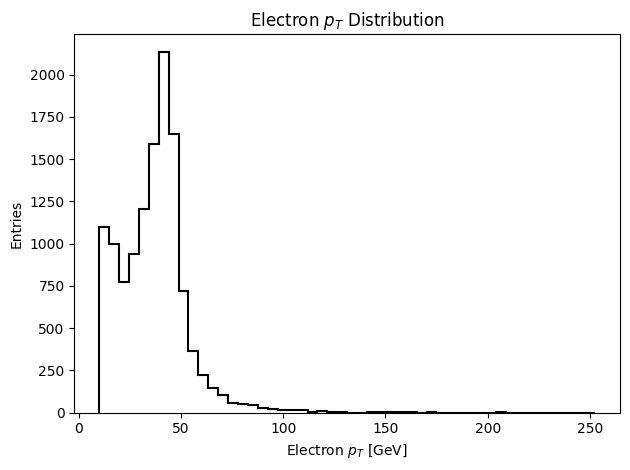

In [18]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Path to your Delphes ROOT file
path = "./mg5_tutorial/MG5_aMC_v3_5_6/tutorial_pp_ee_local/Events/run_10/tag_1_delphes_events.root"

# Open file & tree
f    = uproot.open(path)
tree = f["Delphes"]

# Load the four-vector components
branches = ["Electron.PT", "Electron.Eta", "Electron.Phi", "Electron.T"]
arrs     = tree.arrays(branches, library="np")

# Flatten jagged arrays
pt  = np.concatenate(arrs["Electron.PT"])    # in GeV
eta = np.concatenate(arrs["Electron.Eta"])
phi = np.concatenate(arrs["Electron.Phi"])
E   = np.concatenate(arrs["Electron.T"])     # energy in GeV

# Reconstruct momentum components
px = pt * np.cos(phi)
py = pt * np.sin(phi)
pz = pt * np.sinh(eta)

# Compute invariant mass in GeV, protect against small negatives
mass_GeV = np.sqrt(np.clip(E**2 - (px**2 + py**2 + pz**2), 0, None))
# Convert mass to keV
mass_keV = mass_GeV * 1e6

# ---- Plot Electron pT (GeV) ----
plt.figure()
plt.hist(
    pt,
    bins=50,
    histtype="step",
    color="black",
    linewidth=1.5
)
plt.xlabel("Electron $p_T$ [GeV]")
plt.ylabel("Entries")
plt.title("Electron $p_T$ Distribution")
plt.tight_layout()
plt.show()


In [13]:
import uproot

path = "./mg5_tutorial/MG5_aMC_v3_5_6/tutorial_pp_ee_local/Events/run_10/tag_1_delphes_events.root"
f    = uproot.open(path)
tree = f["Delphes"]

# Filter and print
electron_keys = [k for k in tree.keys() if "Electron" in k]
print("Electron-related branches:")
print("\n".join(electron_keys))


Electron-related branches:
Electron
Electron/Electron.fUniqueID
Electron/Electron.fBits
Electron/Electron.PT
Electron/Electron.Eta
Electron/Electron.Phi
Electron/Electron.T
Electron/Electron.Charge
Electron/Electron.EhadOverEem
Electron/Electron.Particle
Electron/Electron.IsolationVar
Electron/Electron.IsolationVarRhoCorr
Electron/Electron.SumPtCharged
Electron/Electron.SumPtNeutral
Electron/Electron.SumPtChargedPU
Electron/Electron.SumPt
Electron/Electron.D0
Electron/Electron.DZ
Electron/Electron.ErrorD0
Electron/Electron.ErrorDZ
Electron_size


## 11. Next Steps
- Explore other final states
- Tune cuts and PDF choices
- Automate with scripts
- Integrate with full detector simulation